# Clasificación de Agua Potable 

### Proyecto Final - Data Sience - CoderHouse 2021

#### Autores:  Andrés Fernández  - Ignacio Nieva



## Tabla de contenidos

1. Descripción del caso de negocio
2. Tabla de versionado
3. Objetivos del modelo
4. Descripción del caso de negocio
5. Objetivos del modelo
6. Descripción de los datos
7. Hallazgos del EDA
8. Algoritmo elegido
9. Métricas de desempeño
10. Optimización
11. Futuras líneas
12. Conclusiones



## Descripción del caso de negocio

El acceso al agua potable es esencial para la salud, un derecho humano básico y un componente de una política eficaz de protección de la salud. Esto es importante como cuestión de salud y desarrollo a nivel nacional, regional y local. En algunas regiones, se ha demostrado que las inversiones en abastecimiento de agua y saneamiento pueden producir un beneficio económico neto, ya que las reducciones de los efectos adversos para la salud y los costos de atención de la salud superan los costos de realizar las intervenciones.

En este contexto surge la necesidad del análisis y la clasificación de la calidad del agua potable.  

## Tabla de versionado

| Vsn  | Fecha      | Comentarios               |
| ---- | ---------- | ------------------------- |
| 1.0  | 17-10-2021 | Compilación de documentos |



## Objetivos del modelo

El objetivo del modelo es lograr estimar la potabilidad de una muestra de agua conforme a las variables de entradas: PH, hardness, solid, chloramines, sulfate, conductivity, organic carbon, trihalomethanes, turbidity.  

## Descripción de los datos 

Para este ejercicio utilizaremos el dataset publicado en el sitio https://www.kaggle.com/ referencia: https://www.kaggle.com/adityakadiwal/water-potability

El archivo water_potability.csv contiene métricas de calidad del agua para 3276 cuerpos de agua diferentes.

### Referencias de las columnas

#### PH

El pH del agua es una métrica importante para determinar su equilibrio ácido-base. También se puede utilizar para determinar si el agua es ácida o alcalina. El límite máximo permitido de pH ha sido establecido en 6.5 a 8.5 por la OMS.

#### Hardness (Dureza)

Se denomina dureza del agua a la concentración de compuestos minerales que hay en una determinada cantidad de agua, en particular sales de magnesio y calcio.

No se ha establecido límite para este parámetro ya que la Organización Mundial de la Salud determina que tanto si la dureza del agua es alta o está en valores bajos no se produce ningún efecto pernicioso para la salud de las personas.

#### Solid (Solidos)

Potasio, calcio, sodio, bicarbonatos, cloruros, magnesio, sulfatos y otros minerales o sales inorgánicos y orgánicos pueden disolverse en agua. Este es un criterio importante para el uso del agua. La presencia de un alto valor de TDS en el agua sugiere que está muy mineralizada. El límite deseable para TDS es 500 mg/l y el límite máximo es 1000 mg/l.

#### Chloramines

Los principales desinfectantes utilizados en los sistemas públicos de agua son el cloro y la cloramina. Cuando se agrega amoníaco al cloro para purificar el agua potable, se generan cloraminas. Los niveles de cloro en el agua potable de hasta 4 miligramos por litro (mg / L o 4 partes por millón (ppm)) se consideran seguros.

#### Sulfate

El nivel máximo de sulfato sugerido por la Organización Mundial de la Salud (OMS) en las Guías para la calidad del agua potable es de 500 mg/l. Las normas de la UE son más completas y estrictas que la OMS, lo que sugiere un máximo de 250 mg/l de sulfato en el agua destinada al consumo humano.

#### Conductivity

El agua pura es un buen aislante en lugar de un buen conductor de corriente eléctrica. La conductividad eléctrica del agua mejora a medida que aumenta la concentración de iones. La conductividad eléctrica del agua suele estar determinada por la cantidad de partículas disueltas en ella. La conductividad eléctrica (CE) es una medida del proceso iónico de una solución, que le permite transmitir corriente.

Las aguas potables de mejor calidad tienen una conductividad de 50-500 mmhos/cm, pero algunas pueden tener valores de hasta 1.000-1.500 mmhos/cm.

#### Organic_carbon

El carbono orgánico total (COT) en las fuentes de agua proviene de la materia orgánica natural en descomposición (NOM), así como de fuentes sintéticas. TOC es una medida de la cantidad total de carbono en compuestos orgánicos en agua pura.

#### Trihalomethanes

Los THM son compuestos que se pueden encontrar en el agua tratada con cloro. Los niveles de THM en el agua potable varían según la cantidad de materia orgánica en el agua, la cantidad de cloro necesaria para tratar el agua y la temperatura del agua que se está tratando. Los niveles de THM en el agua potable de hasta 80 ppm se consideran seguros.

#### Turbidity

La cantidad de materia sólida en estado suspendido determina la turbidez del agua. Es una prueba que determina la calidad de la descarga de residuos en términos de materia coloidal midiendo las propiedades emisoras de luz del agua. El valor recomendado por la OMS de 5,00 NTU.

#### Potability

Indica el resultado de la clasificación de la muestra.  

## Hallazgos del EDA

Realizando el análisis exploratorio de los datos nos encontramos con datos missing dentro de las columnas: Ph, Sulfate y Trihalomethanes  y outliers en todos los feauters.

In [1]:
# Importamos las libreria de uso
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Importamos el dataset a un Dataframe de Pandas
df = pd.read_csv('./water_potability.csv')

#imprimimos la cantidad y tipos de datos de cada columna del dataframe
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Desde este punto de partida aplicamos distintas estrategias y comparamos resultados en la aplicación del modelo.  

Eliminamos los registros con datos missings y los remplazamos por su media.
    
Comparamos resultados eliminando tanto conservando como eliminando outliers.   

Finalmente generamos el dataset  **"water_potability_clean.csv"**.  con el remplazo de missigs y outliers cuyo resultando final nos da un dataset 2779 registros, presentando un moderado desbalance. 

<AxesSubplot:ylabel='Potability'>

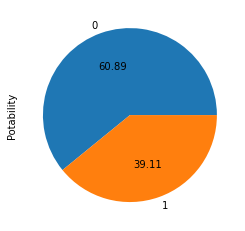

In [15]:
data_clean = pd.read_csv('./water_potability_clean.csv')
data_clean['Potability'].value_counts().plot.pie(autopct='%.2f')

Asimismo analizamos las distribuciones de cada featuer y buscamos correlaciones entre los mismos y nuestra variable targuet.

A través de los sucesivos análisis solo hallamos correlaciones débiles al comparar las muestras potables y no potables por separado, las cuales presentan distribuciones similares para cada una de las variables estudiadas. Tampoco logramos observar los patrones esperados en relacion a los limites permisibles de la referencias.  

In [5]:
# Tabla compartiva entre el agua portable y la no potable. 
x_data = data_clean.drop("Potability", axis=1)

Potable = x_data[data_clean['Potability'] == 1]
No_potable = x_data[data_clean['Potability'] == 0]

comp = pd.DataFrame({'min_potable': Potable.min(), 'mean_potable':Potable.mean(), 'max_potable':Potable.max(), 'min_no_potable':No_potable.min(),'mean_no_potable':No_potable.mean(), 'max_no_potable':No_potable.max()})
comp

,min_potable,mean_potable,max_potable,min_no_potable,mean_no_potable,max_no_potable
ph,4.187491,7.048271,9.917092,4.197584,7.075677,9.927024
Hardness,124.007350,196.796282,272.111698,122.541040,196.577758,270.209549
Solids,728.750830,21735.816327,43680.222521,320.942611,21355.368846,43195.473668
Chloramines,3.308977,7.160607,10.886742,3.296157,7.090076,10.908687
Sulfate,187.170714,333.654394,481.030642,203.444521,334.381716,458.441072
Conductivity,201.619737,424.321789,649.805765,210.319182,426.540296,652.537592
Organic_carbon,5.426650,14.211555,22.641598,5.537059,14.357505,23.135952
Trihalomethanes,27.663174,66.591951,106.037222,27.095703,66.280472,106.371720
Turbidity,1.917754,3.964830,6.083772,1.872573,3.971746,6.099632


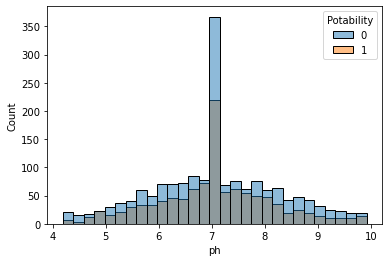

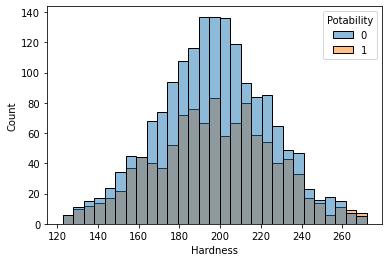

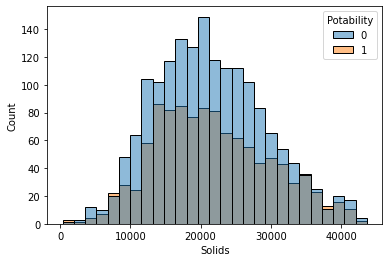

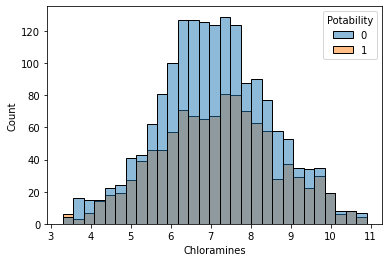

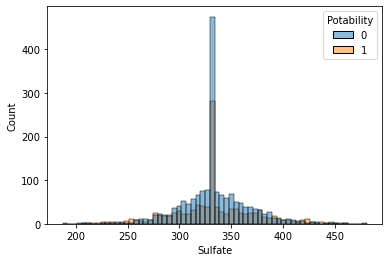

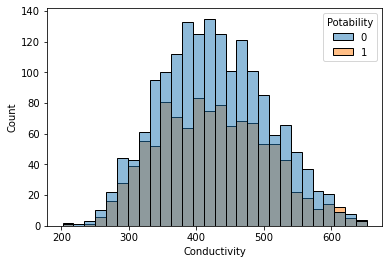

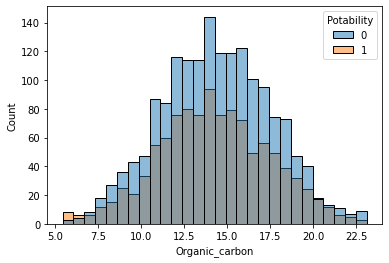

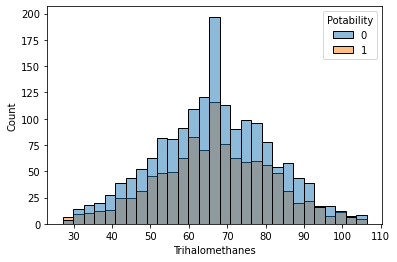

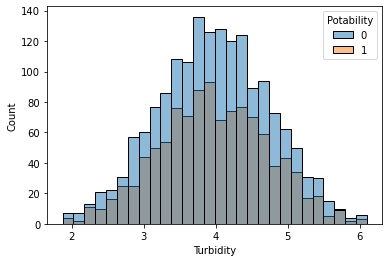

In [14]:
# Graficos deistribucion
for column in x_data:
    sns.histplot(x=column, hue="Potability", data=data_clean)
    plt.show()

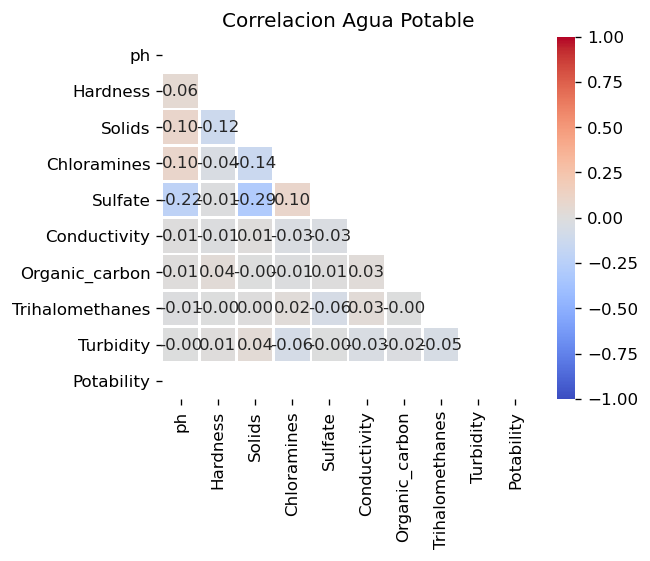

In [17]:
#Mapa de correlaciones para el agua potable

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(data_clean.corr(),dtype = bool))
sns.heatmap(data_clean[data_clean['Potability'] == 1].corr(),mask = mask, fmt = ".2f",vmin = -1, vmax = +1, annot = True, lw=1,cmap = 'coolwarm')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlacion Agua Potable')
plt.show()



Concluimos entonces que la clasificación del dataset es poco confiable y parecía ser aleatoria. Sin embargo, continuamos hacia el objetivo final aplicando diversos modelos.   

El data wrangling y análisis completo se encuentra en el notebook **"Entrega1-Fernandez-Nieva.ipynb"**     

## Algoritmo elegido

Habiendo probado varios modelos durante las entregas parciales incluyendo: árbol de dicción, KNN, regresión logística, modelo bayesiano y random forest.  Seleccionamos el ultimo modelo con el algoritmo XGBoost. Sin embargo las métricas de desempeño no varían mucho entre uno y otro modelo lo cual entendemos que se explica por la baja calidad de las clasificaciones en el dataset. 

Comparativamente en el notebook **"Entrega2-Fernandez-Nieva.ipynb"** se encuentra la aplicación del algoritmo Random Forest 

### Aplicación del Algoritmo XGBoostClassifier

In [18]:
#Separamos los datos de entrada de la salida en df
X = data_clean.drop('Potability', axis=1) #Elimino de mi dataset la variable a predecir
y = data_clean.Potability #Defino el Target

In [19]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

In [20]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
#creamos un array de las metricas que voy a evaluar en cada modelo
metricas=['Accuracy Train','Accuracy Test','Precision Train','Precision Test','Recall Train','Recall Test','F1 Train','F1 Test','Auc']

In [23]:
import xgboost as xgb
modelo_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,seed=123)
modelo_xgb.fit(X_train,y_train)

[17:24:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nieva\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [24]:
y_train_pred_XGB = modelo_xgb.predict(X_train) 
y_test_pred_XGB = modelo_xgb.predict(X_test)

## Métricas de desempeño

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [26]:
#Calculo el accuracy en Train
train_accuracy_XGB = accuracy_score(y_train, y_train_pred_XGB)
print('% de aciertos sobre el set de entrenamiento con XGBClassifier:',train_accuracy_XGB)
#Calculo el accuracy en Test
test_accuracy_XGB = accuracy_score(y_test, y_test_pred_XGB)
print('% de aciertos sobre el set de evaluación con XGBClassifier:',test_accuracy_XGB)

% de aciertos sobre el set de entrenamiento con XGBClassifier: 0.8215938303341902
% de aciertos sobre el set de evaluación con XGBClassifier: 0.6630695443645084


In [27]:
#Calculo precision Score en Train
train_precision_XGB = precision_score(y_train, y_train_pred_XGB)
print('Precision Score sobre el set de entrenamiento con XGBClassifier:',train_precision_XGB)
#Calculo precision Score en Test
test_precision_XGB = precision_score(y_test, y_test_pred_XGB)
print('Precision Score sobre el set de evaluación con XGBClassifier:',test_precision_XGB)

Precision Score sobre el set de entrenamiento con XGBClassifier: 0.9468085106382979
Precision Score sobre el set de evaluación con XGBClassifier: 0.6127167630057804


In [28]:
#Calculo recall Score en Train
train_recall_XGB = recall_score(y_train, y_train_pred_XGB)
print('Recall Score sobre el set de entrenamiento con XGBClassifier:',train_recall_XGB)
#Calculo recall Score en Test
test_recall_XGB = recall_score(y_train, y_train_pred_XGB)
print('Recall Score sobre el set de evaluacion con XGBClassifier:',test_recall_XGB)

Recall Score sobre el set de entrenamiento con XGBClassifier: 0.5801825293350718
Recall Score sobre el set de evaluacion con XGBClassifier: 0.5801825293350718


In [29]:
#Calculo F1 Score en Train
train_f1_XGB = f1_score(y_train, y_train_pred_XGB)
print('F1 Score sobre el set de entrenamiento con XGBClassifier:',train_f1_XGB)
#Calculo F1 Score en Test
test_f1_XGB = f1_score(y_train, y_train_pred_XGB)
print('F1 Score sobre el set de evaluacion con XGBClassifier:',test_f1_XGB)

F1 Score sobre el set de entrenamiento con XGBClassifier: 0.719482619240097
F1 Score sobre el set de evaluacion con XGBClassifier: 0.719482619240097


In [30]:
# Calculo CURVA - ROC
class_probabilities = modelo_xgb.predict_proba(X_test)
preds_XGB = class_probabilities[:, 1]
fpr_XGB, tpr_XGB, threshold = roc_curve(y_test, preds_XGB)
roc_auc_XGB = auc(fpr_XGB, tpr_XGB)
# AUC
print(f"AUC for our classifier is: {roc_auc_XGB}")

AUC for our classifier is: 0.6391749756809338


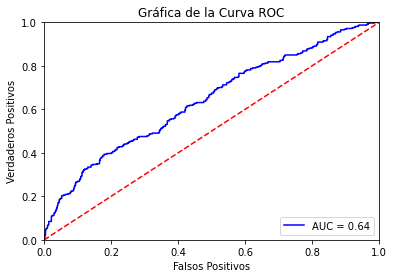

In [31]:
# Gráfica de la Curva ROC
plt.title('Gráfica de la Curva ROC')
plt.plot(fpr_XGB, tpr_XGB, 'b', label = 'AUC = %0.2f' % roc_auc_XGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.show()

In [32]:
metricas_XGB = [train_accuracy_XGB, test_accuracy_XGB,train_precision_XGB,test_precision_XGB,train_recall_XGB,test_recall_XGB,train_f1_XGB,test_f1_XGB,roc_auc_XGB] 
Valores_XGB = pd.Series(metricas_XGB,index=metricas)
Valores_XGB

Accuracy Train     0.821594
Accuracy Test      0.663070
Precision Train    0.946809
Precision Test     0.612717
Recall Train       0.580183
Recall Test        0.580183
F1 Train           0.719483
F1 Test            0.719483
Auc                0.639175
dtype: float64

## Optimizacion

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [35]:
#Aplicamos Grid Search para buscar mejores Hiperparametros
xgb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier',XGBClassifier())])
gbm_param_grid = {
    'classifier__learning_rate': np.array([0.01,0.001]),
    'classifier__n_estimators': np.array([100,200,300,400]),
    'classifier__subsample': np.array([0.7,0.8,0.9]),
    'classifier__max_depth': np.array([10,11,12,13,14,15,16,17]),
    'classifier__lambda': np.array([1]),
    'classifier__gamma': np.array([0])
   
}
grid_search_xgb = GridSearchCV(estimator=xgb_pipeline, param_grid=gbm_param_grid, n_jobs= -1,
                         scoring='accuracy', verbose=10)
#Definicion de Hyperparámetros param_grid = {'alpha':,'min_child_weight':,'subsample':,'eta':,'num_round':}
#Utilizamos la grilla definida anteriormente...

In [36]:
grid_search_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\nieva\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                      

In [49]:
print(grid_search_xgb.best_params_)
#y_train_pred_XGB = model.predict(X_train) 
#y_test_pred_XGB = model.predict(X_test)

{'classifier__gamma': 0, 'classifier__lambda': 1, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 13, 'classifier__n_estimators': 100, 'classifier__subsample': 0.8}


In [38]:
print(grid_search_xgb.score(X_test,y_test))

0.6714628297362111


In [39]:
#Pruebo el mejor modelo para ver todas las metricas
modelo_xgb_best = xgb.XGBClassifier(gamma=0,learning_rate=0.01, objective='binary:logistic',max_depth=13, n_estimators=100, subsample=0.8, seed=123)
modelo_xgb_best.fit(X_train,y_train)

[17:40:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\nieva\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=13, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [40]:
y_train_pred_best = modelo_xgb_best.predict(X_train) 
y_test_pred_best = modelo_xgb_best.predict(X_test)

### Nuevas Metricas

In [41]:
#Calculo el accuracy en Train
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
print('% de aciertos sobre el set de entrenamiento con XGBClassifier:',train_accuracy_best)
#Calculo el accuracy en Test
test_accuracy_best= accuracy_score(y_test, y_test_pred_best)
print('% de aciertos sobre el set de evaluación con XGBClassifier:',test_accuracy_best)

% de aciertos sobre el set de entrenamiento con XGBClassifier: 0.9598971722365038
% de aciertos sobre el set de evaluación con XGBClassifier: 0.684652278177458


In [42]:
#Calculo precision Score en Train
train_precision_best = precision_score(y_train, y_train_pred_best)
print('Precision Score sobre el set de entrenamiento con XGBClassifier:',train_precision_best)
#Calculo precision Score en Test
test_precision_best = precision_score(y_test, y_test_pred_best)
print('Precision Score sobre el set de evaluación con XGBClassifier:',test_precision_best)

Precision Score sobre el set de entrenamiento con XGBClassifier: 0.99568345323741
Precision Score sobre el set de evaluación con XGBClassifier: 0.6706586826347305


In [43]:
#Calculo recall Score en Train
train_recall_best = recall_score(y_train, y_train_pred_best)
print('Recall Score sobre el set de entrenamiento con XGBClassifier:',train_recall_best)
#Calculo recall Score en Test
test_recall_best = recall_score(y_train, y_train_pred_best)
print('Recall Score sobre el set de evaluacion con XGBClassifier:',test_recall_best)

Recall Score sobre el set de entrenamiento con XGBClassifier: 0.9022164276401564
Recall Score sobre el set de evaluacion con XGBClassifier: 0.9022164276401564


In [44]:
#Calculo F1 Score en Train
train_f1_best = f1_score(y_train, y_train_pred_best)
print('F1 Score sobre el set de entrenamiento con XGBClassifier:',train_f1_best)
#Calculo F1 Score en Test
test_f1_best = f1_score(y_train, y_train_pred_best)
print('F1 Score sobre el set de evaluacion con XGBClassifier:',test_f1_best)

F1 Score sobre el set de entrenamiento con XGBClassifier: 0.9466484268125854
F1 Score sobre el set de evaluacion con XGBClassifier: 0.9466484268125854


In [45]:
# Calculo CURVA - ROC
class_probabilities_best = modelo_xgb.predict_proba(X_test)
preds_best = class_probabilities_best[:, 1]
fpr_best, tpr_best, threshold = roc_curve(y_test, preds_best)
roc_auc_best = auc(fpr_best, tpr_best)
# AUC
print(f"AUC for our classifier is: {roc_auc_best}")

AUC for our classifier is: 0.6391749756809338


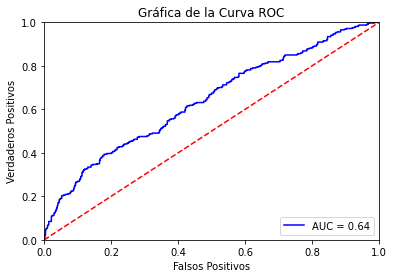

In [46]:
# Gráfica de la Curva ROC
plt.title('Gráfica de la Curva ROC')
plt.plot(fpr_best, tpr_best, 'b', label = 'AUC = %0.2f' % roc_auc_best)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos')
plt.show()

In [47]:
metricas_best = [train_accuracy_best, test_accuracy_best,train_precision_best,test_precision_best,train_recall_best,test_recall_best,train_f1_best,test_f1_best,roc_auc_best] 
Valores_best = pd.Series(metricas_best,index=metricas)
Valores_best

Accuracy Train     0.959897
Accuracy Test      0.684652
Precision Train    0.995683
Precision Test     0.670659
Recall Train       0.902216
Recall Test        0.902216
F1 Train           0.946648
F1 Test            0.946648
Auc                0.639175
dtype: float64

In [48]:
comparativo = pd.DataFrame({'XGB':Valores_XGB,'XGB mejorado':Valores_best,})
comparativo

,XGB,XGB mejorado
Accuracy Train,0.821594,0.959897
Accuracy Test,0.663070,0.684652
Precision Train,0.946809,0.995683
Precision Test,0.612717,0.670659
Recall Train,0.580183,0.902216
Recall Test,0.580183,0.902216
F1 Train,0.719483,0.946648
F1 Test,0.719483,0.946648
Auc,0.639175,0.639175


## Futuras líneas

Habiendo realizado un análisis exhaustivo y testeado varios modelos y algoritmos creemos que el dataset utilizado no amerita mayor profundización.  Si bien podría ser interesante aplicar redes neuronales a este problema creemos que seria necesario contar con datos mas confiables para hacer una mejor aproximación al objetivo final. 

## Conclusiones

El algoritmo seleccionado, así cómo los previamente testeados no consiguieron buenas métricas de desempeño producto de la baja calidad de los datos. El análisis realizado así lo demuestra. Debemos concluir en consecuencia que el objetivo final no puede ser alcanzado con una mayor fiabilidad este set de datos.   